In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
graph_types = ['bk_part_obj_color',
               'bk_obj_color',
               'cds_part_obj_color',
               'cds_obj_color'
              ]
modelnames = [
    'inception_imageneta_bias',
    'squeezenet_imageneta_bias',
    'inception_utensil_both_bias',
    'inception_utensil_color_bias',
    'squeezenet_utensil_both_bias',
    'squeezenet_utensil_color_bias',
    
]
imagenet_classes = [
    'ants',
    'mantis',
    'bees'
]
utensil_classes = [
    'TEA_SPOON',
    'FISH_SLICE',
    'DINNER_CUTLERY'
]

## generate all heatmaps

In [ ]:
for gt in graph_types:
    Path("heatmaps/"+gt).mkdir(parents=True, exist_ok=True)
    for modelname in modelnames:
        if 'imagenet' in modelname:
            classnames = imagenet_classes
        else:
            classnames = utensil_classes
        for classname in classnames:
            filename = modelname+'_'+classname+'.csv'
            if glob.glob(gt+'/mediation/'+filename):
            
                filename = modelname+'_'+classname+'.csv'
                print(gt+'/mediation/'+filename)
                png = 'heatmaps/'+gt+'/'+os.path.basename(filename)[:-4] + '.png'
                try:
                    df = pd.read_csv(gt+'/mediation/'+filename)
                except:
                    continue
                if len(df) == 0:
                    continue
                df = df.replace('primary_concept_','',regex=True)
                df = df.replace('color_','',regex=True)
                df['primary_concept'] = df['primary_concept'].replace('knif','knife')
                df['primary_concept'] = df['primary_concept'].replace('spatial','spatula')
                df['primary_concept'] = df['primary_concept'].replace('(^.*spatula.*$)', 'spatula',regex=True)

                ylabels = df['mediator'].unique().tolist()
                xlabels = df['primary_concept'].unique().tolist()

                N = len(ylabels)
                M = len(xlabels)
    #             print(M,N)
                # tmp_x = heat.columns.values
                # tmp_y = heat.index.values

                # x, y = np.meshgrid(tmp_x,tmp_y)
                # s = np.random.randint(0, 180, size=(N,M))
                s = df['total'].values
                c = df['nie'].values
                # c = np.random.rand(N, M) - 0.5


                fig, ax = plt.subplots(figsize=(20, 10))

                R = s/s.max()/2
                circles = [plt.Circle((xlabels.index(df.loc[i, "primary_concept"]), ylabels.index(df.loc[i, "mediator"])), radius=r) for i, r in enumerate(R)]
                col = PatchCollection(circles, array=c.flatten(), cmap="inferno")
                ax.add_collection(col)

                ax.set(xticks=np.arange(M), yticks=np.arange(N),
                       xticklabels=xlabels, yticklabels=ylabels)
                ax.set_xticks(np.arange(M+1)-0.5, minor=True)
                ax.set_yticks(np.arange(N+1)-0.5, minor=True)
                ax.grid(which='minor')

                fig.colorbar(col)
    #             plt.show()
                plt.savefig(png)
                plt.close()

## single instance

In [ ]:
df = pd.read_csv('')

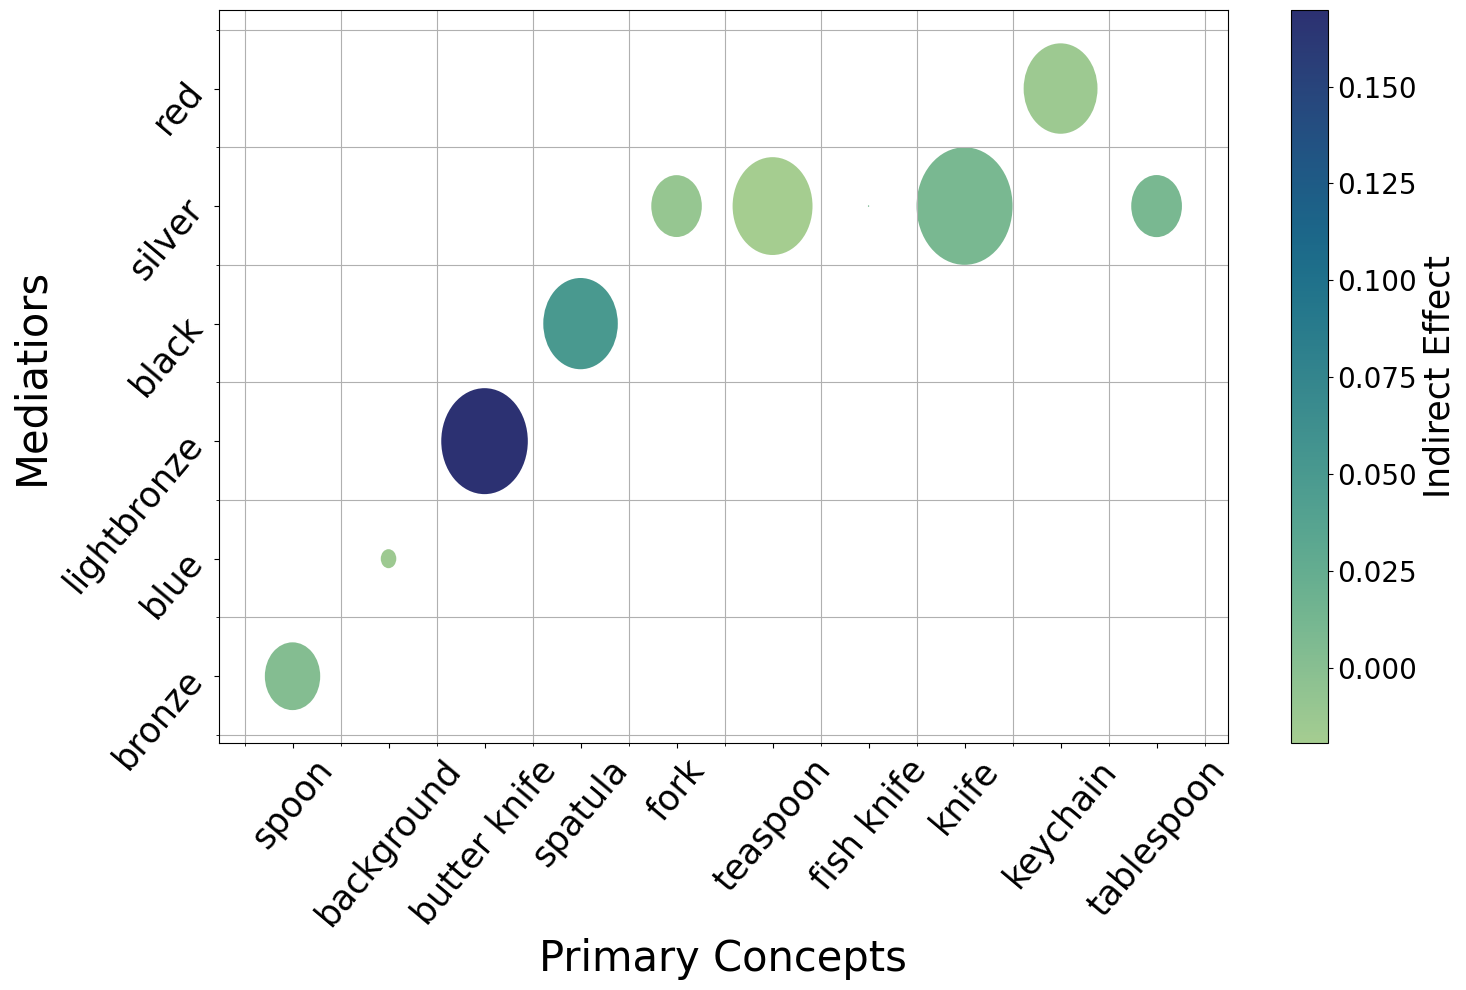

In [324]:
df = df.replace('primary_concept_','',regex=True)
df = df.replace('color_','',regex=True)

df['primary_concept'] = df['primary_concept'].replace('butter_knife','butter knife')
# df['primary_concept'] = df['primary_concept'].replace('background','bkg')
df['primary_concept'] = df['primary_concept'].replace('fish_knife','fish knife')

df['primary_concept'] = df['primary_concept'].replace('guitar_keychain','keychain')
df['primary_concept'] = df['primary_concept'].replace('knif','knife')
df['primary_concept'] = df['primary_concept'].replace('spatial','spatula')
df['primary_concept'] = df['primary_concept'].replace('(^.*spatula.*$)', 'spatula',regex=True)

ylabels = df['mediator'].unique().tolist()
xlabels = df['primary_concept'].unique().tolist()

N = len(ylabels)
M = len(xlabels)



s = df['total'].values
c = df['nie'].values



fig, ax = plt.subplots(figsize=(15, 10))

R = s/s.max()/2
circles = [plt.Circle((xlabels.index(df.loc[i, "primary_concept"]), ylabels.index(df.loc[i, "mediator"])), fill=False,radius=r,linewidth=100) for i, r in enumerate(R)]
col = PatchCollection(circles, array=c.flatten(), cmap="crest")
ax.add_collection(col)

ax.set(xticks=np.arange(M), yticks=np.arange(N),
       xticklabels=xlabels, yticklabels=ylabels)
ax.set_xticks(np.arange(M+1)-0.5, minor=True)
ax.set_yticks(np.arange(N+1)-0.5, minor=True)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=20)


# for a in ax:
ax.tick_params(labelrotation = 50, axis = 'x')
ax.tick_params(labelrotation = 50, axis = 'y')

#     a.set(xlabel="",
#           ylim=(-1,1))
for label in ax.get_xticklabels():
    label.set_fontsize("25")
for label in ax.get_yticklabels():
    label.set_fontsize("25")
ax.set_xticklabels(ax.get_xticklabels(), ha="center")
sns.color_palette()
# for label in ax.get_xticklabels():
#     label.set_fontsize("20")
# for label in ax.get_yticklabels():
#     label.set_fontsize("20")

ax.grid(which='minor')
ax.autoscale_view()

# cb.
ax.set_ylabel('Mediatiors', fontsize=30)
ax.set_xlabel('Primary Concepts', fontsize=30)
cb = fig.colorbar(col)
cb.ax.tick_params(labelsize=20)
cb.ax.set_ylabel('Indirect Effect', fontsize=25)
fig.tight_layout();
fig.savefig("mediation.pdf", dpi=200);
plt.show()
